## Step 1: Download and understand the data

In [1]:
import pandas as pd

# Train-test split
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the data
cols = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
df_car = pd.read_csv('input/car.data', names=cols)
df_car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
df_car.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [5]:
for col in cols:
    print("\nfor {} the value counts are \n{}".format(col, df_car[col].value_counts()))


for buying the value counts are 
vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64

for maint the value counts are 
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64

for doors the value counts are 
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64

for persons the value counts are 
2       576
4       576
more    576
Name: persons, dtype: int64

for lug_boot the value counts are 
small    576
med      576
big      576
Name: lug_boot, dtype: int64

for safety the value counts are 
low     576
med     576
high    576
Name: safety, dtype: int64

for class the value counts are 
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [6]:
df_car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

Observation: Data is uniformly distributed on each column except class, which askew towards 'unacc'.

## Preparing the data for model building

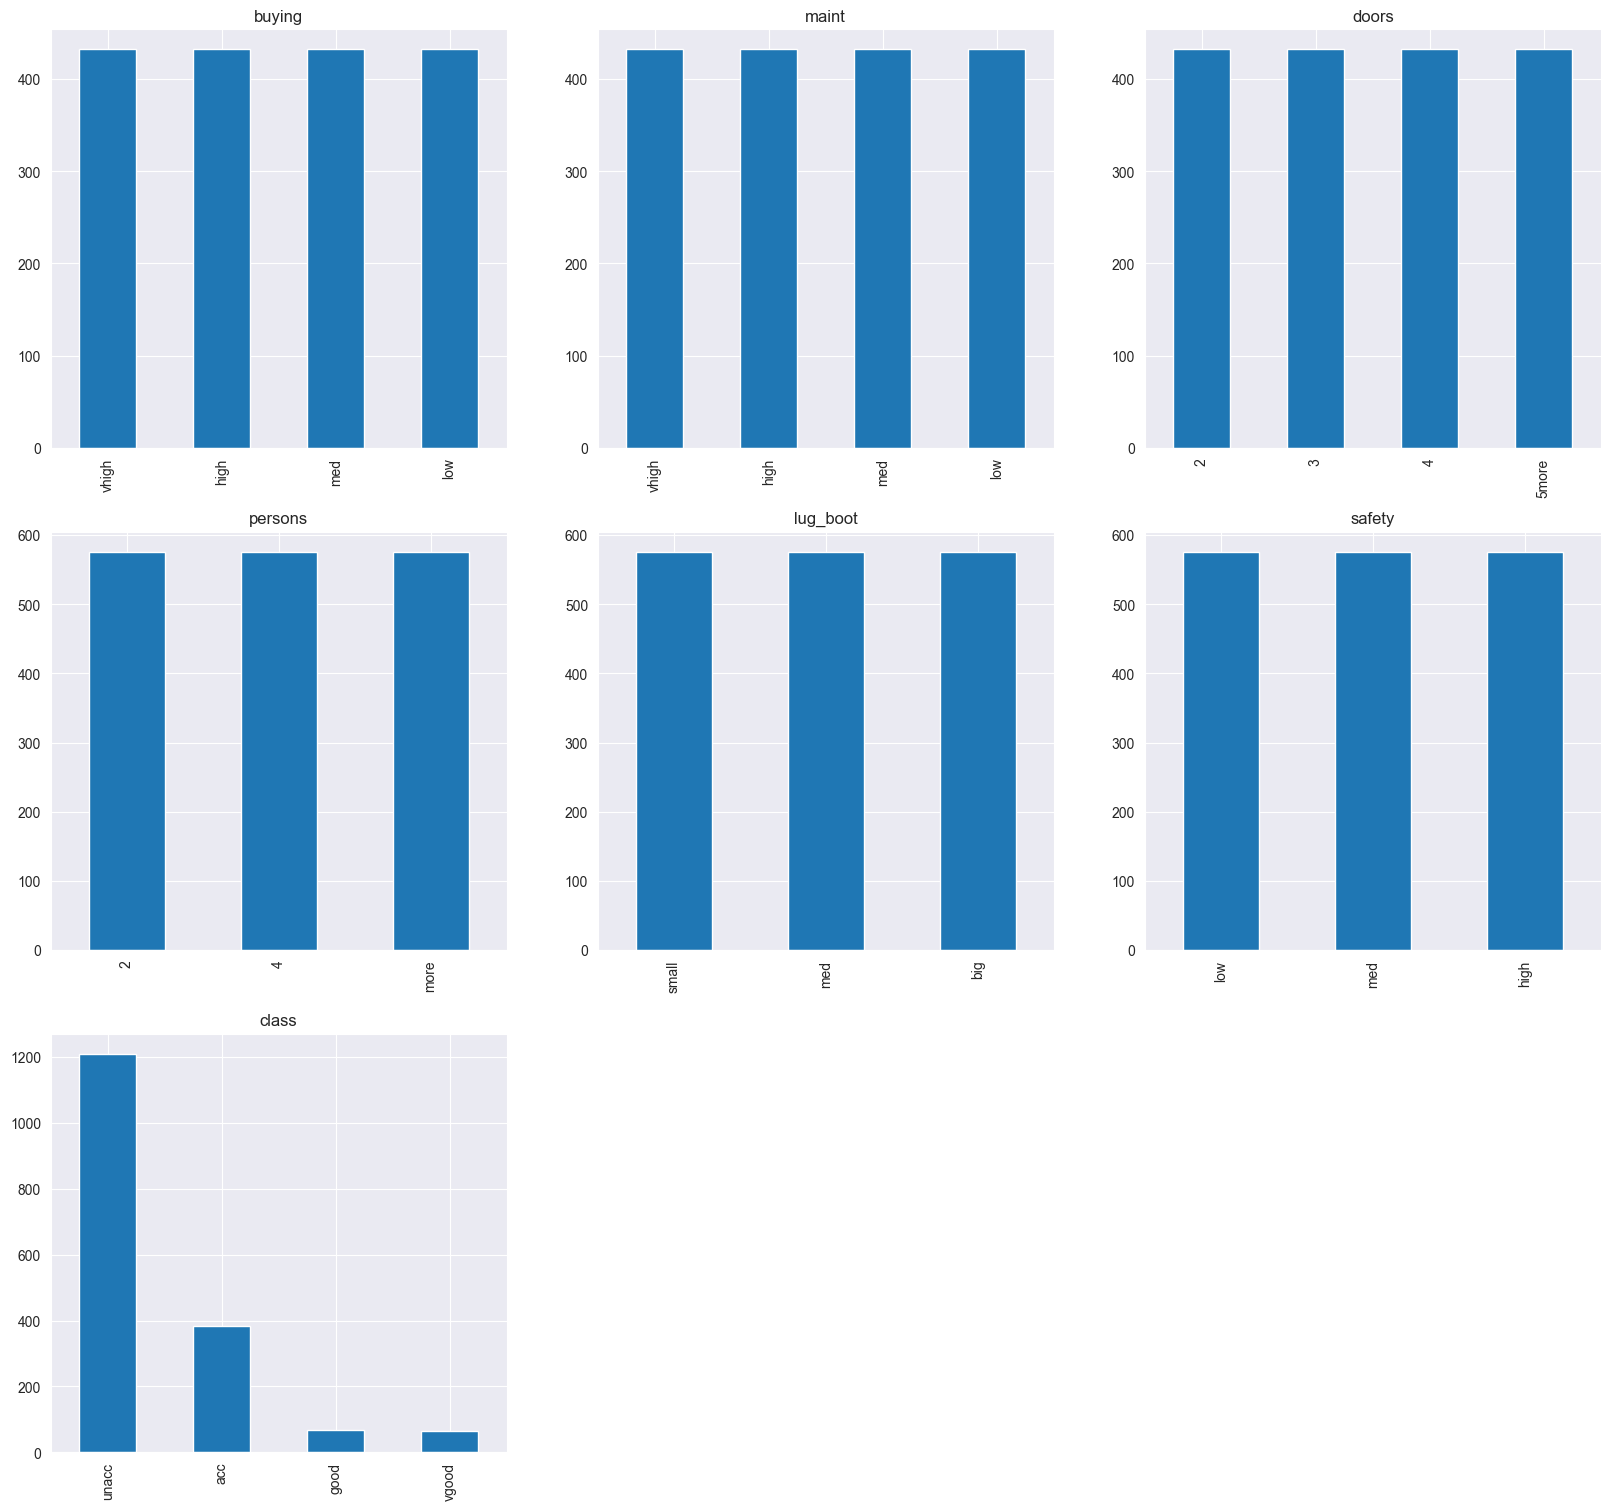

In [7]:
# Listing categorical columns for checking data imbalance and plotting them
features = ["buying", "maint", "doors", "persons", "lug_boot", "safety"]
k=0
plt.figure(figsize=(20,25))
for col in cols:
    k=k+1
    plt.subplot(4, 3,k)
    df_car[col].value_counts().plot(kind='bar');
    plt.title(col)

In [8]:
# Perform Label Encoding for Categorical features that has numeric values

def label_encoding(df):
    df['buying'] = df['buying'].replace({'low':1,'med':2,'high':3,'vhigh':4 }).astype(int)
    df['maint'] = df['maint'].replace({'low':1,'med':2,'high':3,'vhigh':4 }).astype(int)
    df['doors'] = df['doors'].replace({'2':1,'3':2,'4':3,'5more':4 }).astype(int)
    df['persons'] = df['persons'].replace({'2':1,'4':2,'more':3}).astype(int)
    df['lug_boot'] = df['lug_boot'].replace({'small':1,'med':2,'big':3}).astype(int)
    df['safety'] = df['safety'].replace({'low':1,'med':2,'high':3}).astype(int)
    df['class'] = df['class'].replace({'unacc':1,'acc':2,'good':3,'vgood':4 }).astype(int)

    return df


df_car = label_encoding(df_car)
df_car.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,4,4,1,1,1,1,1
1,4,4,1,1,1,2,1
2,4,4,1,1,1,3,1
3,4,4,1,1,2,1,1
4,4,4,1,1,2,2,1


In [9]:
features = ["maint", "doors", "persons", "lug_boot", "safety", "class" ]

for i in features:
    print(df_car[['buying',i]].value_counts())

buying  maint
1       1        108
        2        108
        3        108
        4        108
2       1        108
        2        108
        3        108
        4        108
3       1        108
        2        108
        3        108
        4        108
4       1        108
        2        108
        3        108
        4        108
dtype: int64
buying  doors
1       1        108
        2        108
        3        108
        4        108
2       1        108
        2        108
        3        108
        4        108
3       1        108
        2        108
        3        108
        4        108
4       1        108
        2        108
        3        108
        4        108
dtype: int64
buying  persons
1       1          144
        2          144
        3          144
2       1          144
        2          144
        3          144
3       1          144
        2          144
        3          144
4       1          144
        2          144
     

In [10]:
df_car.value_counts()

buying  maint  doors  persons  lug_boot  safety  class
1       1      1      1        1         1       1        1
3       3      3      2        2         3       2        1
                      3        3         2       2        1
                                         1       1        1
                               2         3       2        1
                                                         ..
2       2      2      1        2         3       1        1
                                         2       1        1
                                         1       1        1
                               1         3       1        1
4       4      4      3        3         3       1        1
Length: 1728, dtype: int64

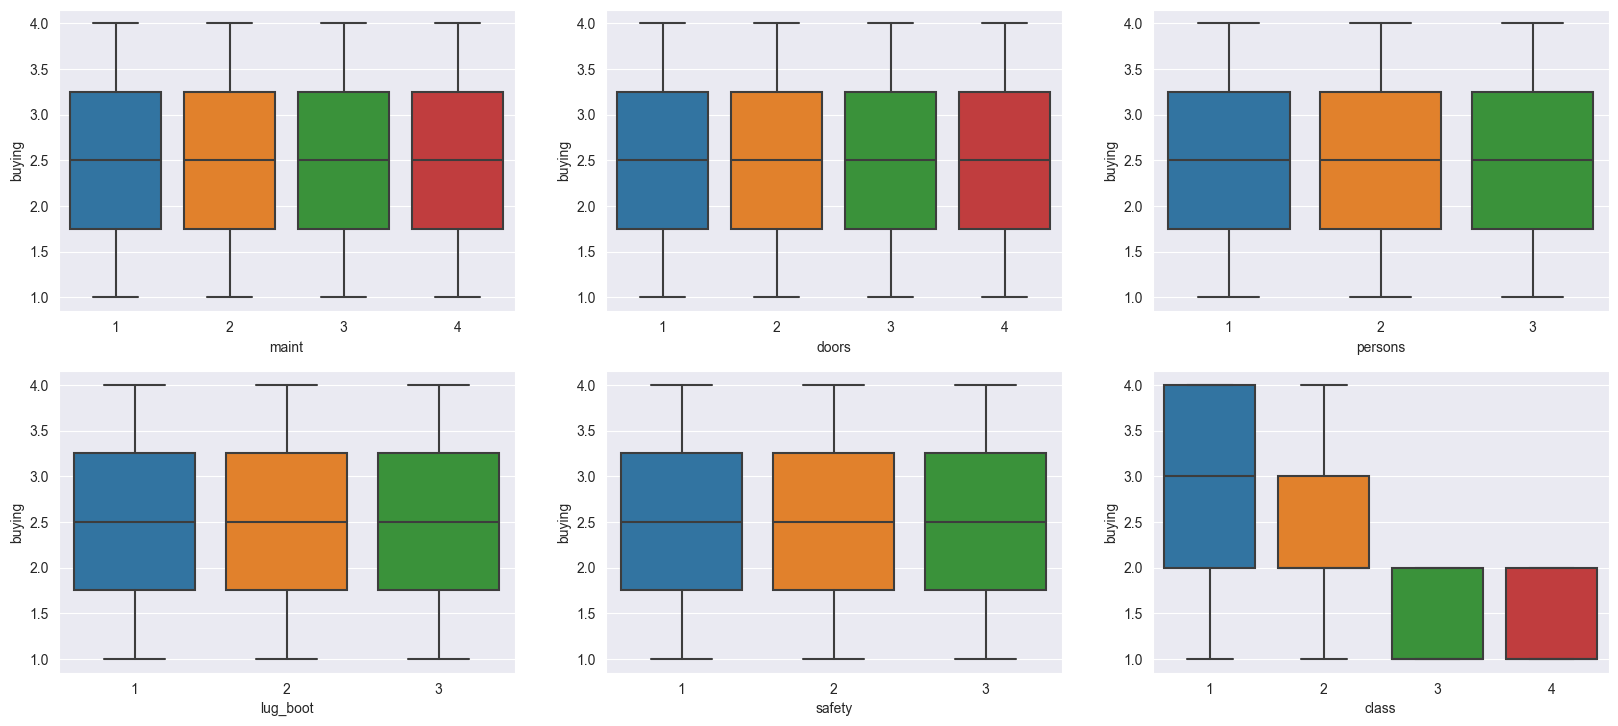

In [11]:
# Boxplot for all categorical variables

features = ["maint", "doors", "persons", "lug_boot", "safety", "class" ]

k=0
plt.figure(figsize=(20,18))
for col in range (len(features)):
    k=k+1
    plt.subplot(4, 3, k)
    ax = sns.boxplot(x = features[col], y = 'buying', data = df_car)

<Axes: >

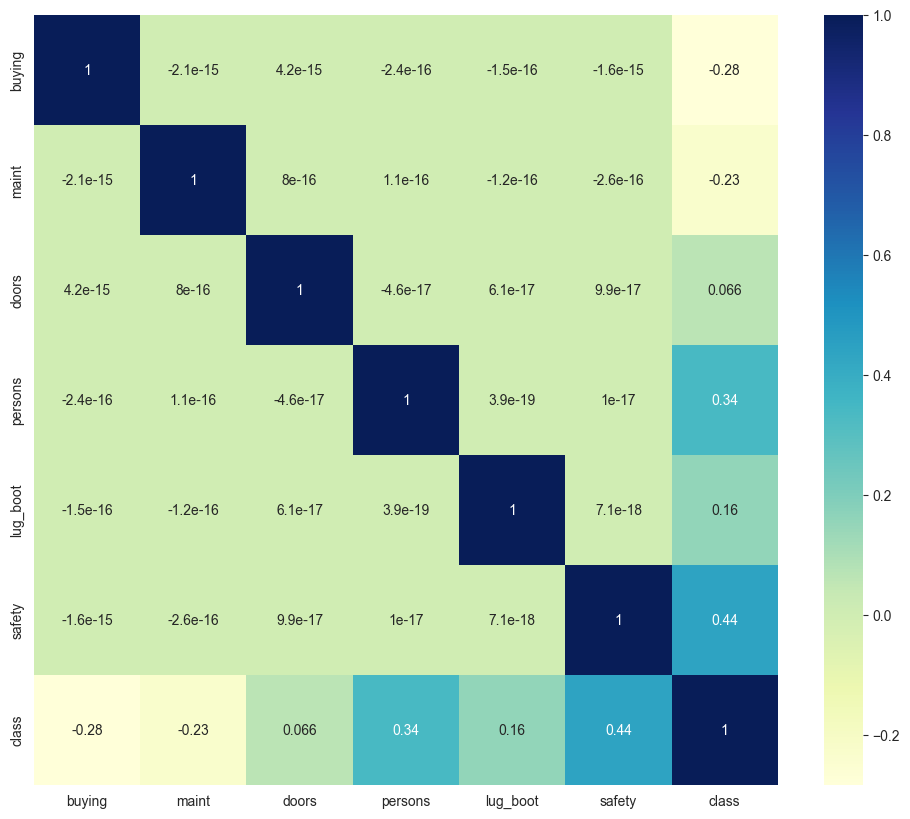

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df_car[cols].corr(),annot=True, cmap="YlGnBu")

## Splitting data into train and test

In [13]:
df_train, df_test = train_test_split(df_car, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(1209, 7)
(519, 7)


In [14]:
# Popping out the 'buying' column for y_train
y_train = df_train.pop('buying')

# Creating X_train
X_train = df_train

In [15]:
# Popping out the 'buying' column for y_train
y_test = df_test.pop('buying')

# Creating X_train
X_test = df_test

In [16]:
results = pd.DataFrame(columns=['Accuracy', 'Train score'])

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

def class_predict(model,model_name):
    y_pred = model.predict(X_test)

    results.loc[model_name, 'Accuracy'] = accuracy_score(y_test,y_pred)
    results.loc[model_name, 'Train score'] = model.score(X_train,y_train)

    print(accuracy_score(y_test,y_pred))
    print()
    print(confusion_matrix(y_test,y_pred))
    print()
    print(classification_report(y_test,y_pred))

## Fit and Predict Model

0.2947976878612717

[[42 55 25  5]
 [44 48 27  8]
 [22 54 27 24]
 [20 40 42 36]]

              precision    recall  f1-score   support

           1       0.33      0.33      0.33       127
           2       0.24      0.38      0.30       127
           3       0.22      0.21      0.22       127
           4       0.49      0.26      0.34       138

    accuracy                           0.29       519
   macro avg       0.32      0.30      0.30       519
weighted avg       0.33      0.29      0.30       519



[Text(0.5446428571428571, 0.9, 'x[5] <= 2.5\nentropy = 2.0\nsamples = 1209\nvalue = [305, 305, 305, 294]'),
 Text(0.2857142857142857, 0.7, 'x[5] <= 1.5\nentropy = 1.995\nsamples = 1114\nvalue = [247, 268, 305, 294]'),
 Text(0.14285714285714285, 0.5, 'x[4] <= 1.5\nentropy = 1.986\nsamples = 840\nvalue = [178, 184, 232, 246]'),
 Text(0.07142857142857142, 0.3, 'x[0] <= 2.5\nentropy = 1.998\nsamples = 400\nvalue = [100, 95, 108, 97]'),
 Text(0.03571428571428571, 0.1, 'entropy = 1.992\nsamples = 196\nvalue = [47, 46, 58, 45]'),
 Text(0.10714285714285714, 0.1, 'entropy = 1.999\nsamples = 204\nvalue = [53, 49, 50, 52]'),
 Text(0.21428571428571427, 0.3, 'x[2] <= 1.5\nentropy = 1.953\nsamples = 440\nvalue = [78, 89, 124, 149]'),
 Text(0.17857142857142858, 0.1, 'entropy = 1.999\nsamples = 263\nvalue = [65, 69, 64, 65]'),
 Text(0.25, 0.1, 'entropy = 1.671\nsamples = 177\nvalue = [13, 20, 60, 84]'),
 Text(0.42857142857142855, 0.5, 'x[0] <= 2.5\nentropy = 1.973\nsamples = 274\nvalue = [69, 84, 73, 

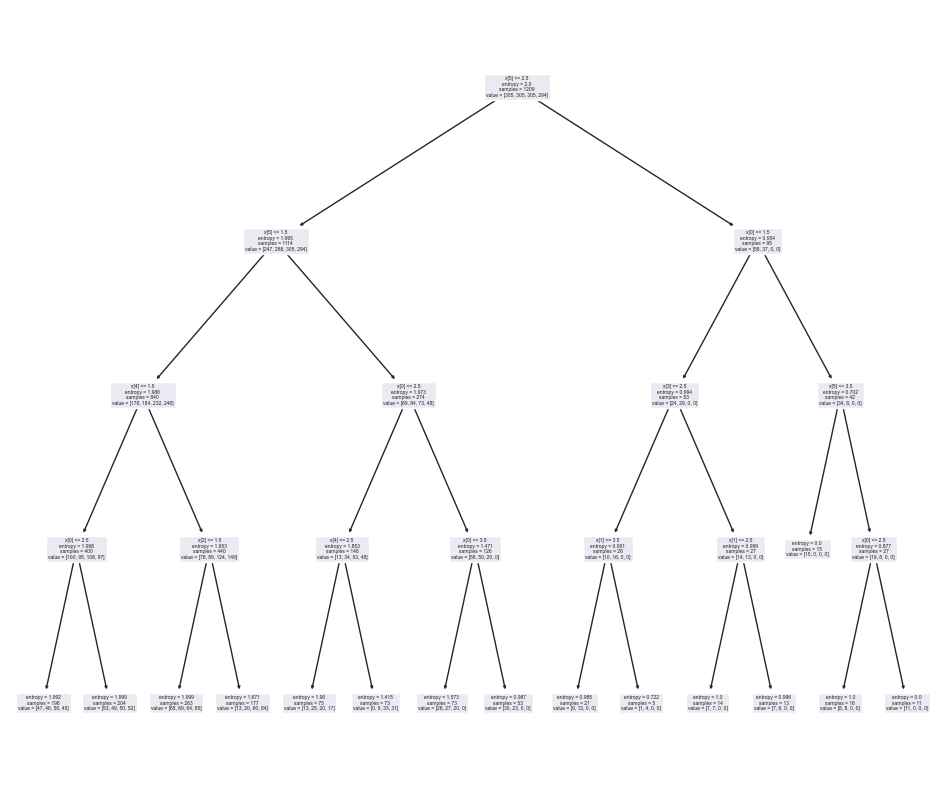

In [19]:
# Decision Tree Classifier -Entropy

from sklearn.tree import DecisionTreeClassifier

clf_ent = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
clf_ent.fit(X_train, y_train)

class_predict(clf_ent,"clf_entropy")

plt.figure(figsize=(12,10))

from sklearn import tree

tree.plot_tree(clf_ent.fit(X_train, y_train))

In [20]:
# Decision Tree Classifier - Gini

clf_gini_index = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)
clf_gini_index.fit(X_train, y_train)

class_predict(clf_gini_index,"clf_gini")

0.28709055876685935

[[42 53 27  5]
 [44 42 33  8]
 [22 52 29 24]
 [20 36 46 36]]

              precision    recall  f1-score   support

           1       0.33      0.33      0.33       127
           2       0.23      0.33      0.27       127
           3       0.21      0.23      0.22       127
           4       0.49      0.26      0.34       138

    accuracy                           0.29       519
   macro avg       0.32      0.29      0.29       519
weighted avg       0.32      0.29      0.29       519



In [27]:
results.sort_values(by=['Accuracy', 'Train score'], ascending=False)

,Accuracy,Train score
clf_entropy,0.294798,0.366419
clf_gini,0.287091,0.369727


## Answer the question
Maintenance = High
Number of doors = 4
Lug Boot Size = Big
Safety = High
Class Value = Good

In [28]:
cols = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
buying_dict = {1:'low',2:'med',3:'high',4: 'vhigh' }

# since we don't have person field lets iterate for all possible scenario's of persons.

person_list = ['2','4','more']


for p in person_list:
    # Adding dummy buying variable , as we drop for predition
    X_ask = pd.DataFrame(['vhigh','high', '4',p, 'big', 'high', 'good']).T
    X_ask.columns = cols
    X_ask = X_ask[cols]
    X_ask = label_encoding(X_ask)
    X_ask = X_ask.drop('buying',axis=1)
    y_ask = clf_ent.predict(X_ask)[0]
    print("Predicted as {} for given features \n {}".format(buying_dict[y_ask],X_ask))

Predicted as low for given features 
    maint  doors  persons  lug_boot  safety  class
0      3      3        1         3       3      3
Predicted as low for given features 
    maint  doors  persons  lug_boot  safety  class
0      3      3        2         3       3      3
Predicted as low for given features 
    maint  doors  persons  lug_boot  safety  class
0      3      3        3         3       3      3


Our ML Model Predicts as 0 (LOW) buying price. <==